In [74]:
import pandas as pd
import numpy as np
import csv as csv

In [75]:
train = pd.read_csv('train.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test = pd.read_csv('test.csv').replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
y_test = pd.read_csv('gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [76]:
print("欠損値の量を確認")
train.isnull().sum()

欠損値の量を確認


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df_train_proc = train.copy()
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [78]:
df_train_proc.dropna(inplace=True)
df_train_proc.drop('PassengerId',axis=1,inplace=True)
df_train_proc.drop('Name',axis=1,inplace=True)
df_train_proc.drop('Ticket',axis=1,inplace=True)
df_train_proc.drop('Cabin',axis=1,inplace=True)

In [79]:
print("相関")
df_train_proc.corr()

相関


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241,0.083231
Pclass,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235,-0.235027
Sex,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433,0.060862
Age,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,0.088112
SibSp,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433,0.015962
Parch,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740,-0.097495
Fare,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000,0.233452
Embarked,0.083231,-0.235027,0.060862,0.088112,0.015962,-0.097495,0.233452,1.000000


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


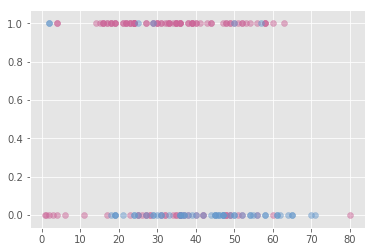

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df_train_sur = df_train_proc[df_train_proc_dn.Survived==1]
df_train_sur_age = df_train_sur.iloc[:,3]
df_train_sur_s = df_train_sur.iloc[:,2]
plt.scatter(df_train_sur_age,df_train_sur_s,color="#cc6699",alpha=0.5)

df_train_sur = df_train_proc[df_train_proc_dn.Survived==0]
df_train_sur_age = df_train_sur.iloc[:,3]
df_train_sur_s = df_train_sur.iloc[:,2]
plt.scatter(df_train_sur_age,df_train_sur_s,color="#6699cc",alpha=0.5)

plt.show()

In [86]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns={'miss','mrs','master','mr'})
    
    for name in name_df:        
        if 'Miss' in name:
            df = pd.DataFrame([[1,0,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Mrs' in name:
            df = pd.DataFrame([[0,1,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Master' in name:
            df = pd.DataFrame([[0,0,1,0]],columns={'miss','mrs','master','mr'})
        elif 'Mr' in name:
            df = pd.DataFrame([[0,0,0,1]],columns={'miss','mrs','master','mr'})
        else :
            df = pd.DataFrame([[0,0,0,0]],columns={'miss','mrs','master','mr'})
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [89]:
train2 = name_classifier(train['Name'])

In [90]:
train2.head()

,miss,mrs,master,mr
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
